# First tutorial : data visualisation and manipulation

The data used in this example was published by the Oak Ridge National Laboratory, Building Technologies Research and Integration Center (USA). It contains end use breakdowns of energy use and various indoor environmental conditions collected at the Campbell Creek Research House #3, at a 15 minute time stamp. The data availability ranges from 10/1/2013 to 9/30/2014.

The main data file `ornlbtricdatafromcc3fy2014.xlsx` comes with a separate file `ornlbtriccchousedatalegend.xlsx` showing information on each column.

This first tutorial shows some tools to import a dataset, visualise it and manipulate it before doing any modelling. This is a Python notebook. By opening it with binder, you can run the code in the browser.

## Data visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing data into a dataframe with the pandas library
df = pd.read_excel('data/ornlbtricdatafromcc3fy2014.xlsx', header=1, skiprows=[2, 3], na_values='NAN')
df.set_index(pd.to_datetime(df['TIMESTAMP']), inplace=True)

# This line shows the first few lines of the dataset
df.head()

,TIMESTAMP,RECORD,main_Tot,Batt_Volt_Avg,PV_generated_Tot,HP_in_Tot,HP_out_Tot,Fantech_Tot,solar_HW_pump_Tot,HW_Tot,...,bath_plg_Tot,gar_ext_lts_Tot,garage_tmp_Avg,jacuzzi_plg_Tot,dishHot_tmp_Avg,washHot_tmp_Avg,L1_heater_Tot,Tstat1_tmp_Avg,Tstat2_tmp_Avg,TV_plg_Tot
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2013-10-01 00:15:00,2013-10-01 00:15:00,767,175.0,12.82,0.00,2.50,8.25,9.000,0.0,0.0,...,6.750,0.500,69.92,33.88,NaN,NaN,48.380,76.40,NaN,0.208
2013-10-01 00:30:00,2013-10-01 00:30:00,768,250.0,12.81,0.75,5.00,15.75,0.708,0.0,0.0,...,0.625,1.250,69.87,61.25,NaN,NaN,93.000,76.40,NaN,0.375
2013-10-01 00:45:00,2013-10-01 00:45:00,769,182.5,12.81,0.75,5.00,15.75,18.250,0.0,0.0,...,0.750,1.250,69.81,68.00,NaN,NaN,0.500,76.27,NaN,0.396
2013-10-01 01:00:00,2013-10-01 01:00:00,770,165.0,12.81,0.75,6.25,16.50,0.667,0.0,0.0,...,0.625,1.125,69.79,60.75,NaN,NaN,0.375,76.12,NaN,0.417
2013-10-01 01:15:00,2013-10-01 01:15:00,771,347.5,12.81,0.00,5.00,15.75,17.630,0.0,0.0,...,58.750,1.250,69.78,65.50,NaN,NaN,89.100,76.27,NaN,0.375


This block converts temperatures from F to C. You only need to run it once.

In [2]:
temperatures = ["RoofS_tmp_Avg","AtticFlrS_tmp_Avg","RoofN_tmp_Avg","AtticFlrN_tmp_Avg","BonusFlr_tmp_Avg",
                "CantFlr_tmp_Avg","WallNcav_tmp_Avg","WallNsrf_tmp_Avg","WallScav_tmp_Avg",
                "WallSsrf_tmp_Avg","FanTsup_tmp_Avg","FanTret_tmp_Avg","FanTexh_tmp_Avg","FanTint_tmp_Avg",
                "Din_tmp_Avg","Grt_tmp_Avg","Brkf_tmp_Avg","Kit_tmp_Avg","BedM_tmp_Avg","Bed3_tmp_Avg",
                "Bed2_tmp_Avg","BedB_tmp_Avg","Mbath_tmp_Avg","Outside_Tmp_Avg"]
for t in temperatures:
    df[t] = (df[t]-32) * 5/9

There are over 100 sensors in the house, The name, meaning and unit of each column are given in the other excel file `ornlbtriccchousedatalegend.xlsx`

Here is how to plot two variables in one graph, during a specific period:

<AxesSubplot:xlabel='TIMESTAMP'>

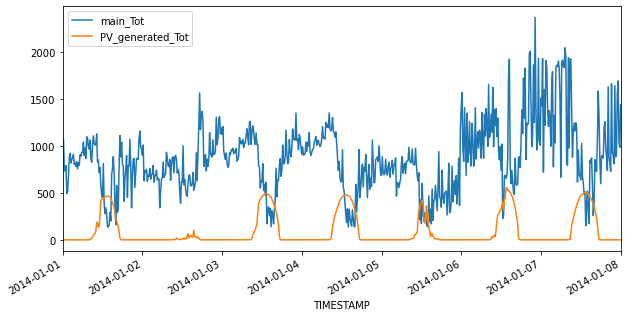

In [3]:
df.plot(y = ['main_Tot', 'PV_generated_Tot'],
        xlim = ['2014-01-01', '2014-01-08'],
        figsize = [10, 5])

Here is how to draw several columns in separate subplots:

array([<AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>],
      dtype=object)

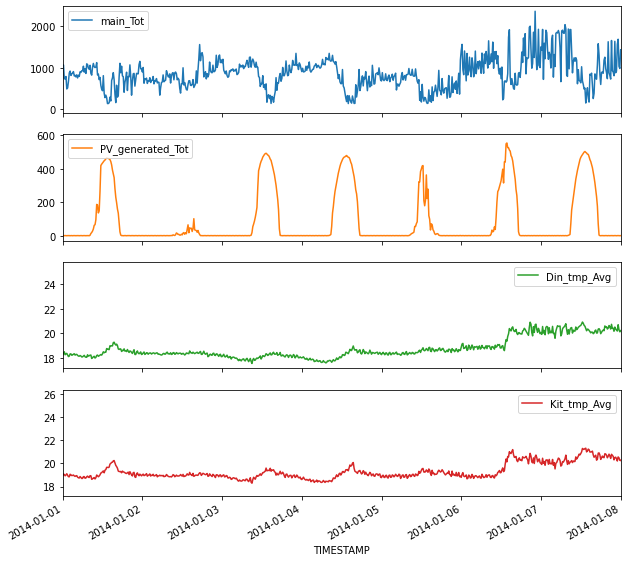

In [4]:
df.plot(y = ['main_Tot', 'PV_generated_Tot','Din_tmp_Avg','Kit_tmp_Avg'],
        subplots = True,
        xlim = ['2014-01-01', '2014-01-08'],
        figsize = [10, 10])

Here is a scatter plot

<AxesSubplot:xlabel='SlrW1_Avg', ylabel='PV_generated_Tot'>

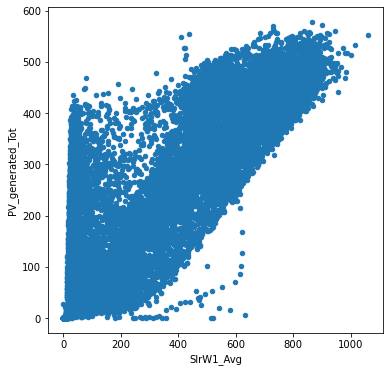

In [5]:
df.plot.scatter(x = 'SlrW1_Avg',
                y = 'PV_generated_Tot',
                figsize = [6, 6])

### Exercise

In the following block, make a single graph showing all the room ambient temperatures

## Data manipulation

The following block creates a new dataframe called `df_day` where measurements are averaged daily.

In [6]:
df_day = df.groupby(df.index.date).mean()

df_day.head()

,RECORD,main_Tot,Batt_Volt_Avg,PV_generated_Tot,HP_in_Tot,HP_out_Tot,Fantech_Tot,solar_HW_pump_Tot,HW_Tot,bathup_lts_Tot,...,bath_plg_Tot,gar_ext_lts_Tot,garage_tmp_Avg,jacuzzi_plg_Tot,dishHot_tmp_Avg,washHot_tmp_Avg,L1_heater_Tot,Tstat1_tmp_Avg,Tstat2_tmp_Avg,TV_plg_Tot
2013-10-01,814.0,401.326316,12.801684,116.793684,12.434211,49.613684,9.928411,0.0,36.057895,3.128947,...,16.671368,3.880737,70.098421,28.923474,100.55,97.50,41.901158,75.609474,NaN,5.007537
2013-10-02,909.5,410.817708,12.796042,100.570312,14.986979,61.371354,9.808750,0.0,35.083333,3.151042,...,16.927604,3.828594,70.724583,29.033646,100.70,97.30,40.890156,75.684375,NaN,4.933740
2013-10-03,1005.5,395.817708,12.798021,107.322917,15.963542,66.444271,9.781583,0.0,35.187500,3.151042,...,16.901667,3.831146,71.432708,29.033438,100.80,98.05,40.799271,75.634687,NaN,4.940271
2013-10-04,1101.5,353.265625,12.791458,123.767708,16.106771,70.785938,9.787115,0.0,31.140625,3.148438,...,16.872240,3.836302,71.463646,28.982812,NaN,NaN,40.737396,75.517500,NaN,4.947344
2013-10-05,1197.5,363.984375,12.794063,129.954688,17.343750,79.419792,9.784729,0.0,29.666667,3.148438,...,16.856458,3.840365,71.553750,30.879167,NaN,NaN,40.832604,75.692917,NaN,4.941771


We can also compute new columns. Here is a new column which is the average indoor temperature, calculated as the mean of several columns:

<AxesSubplot:xlabel='TIMESTAMP'>

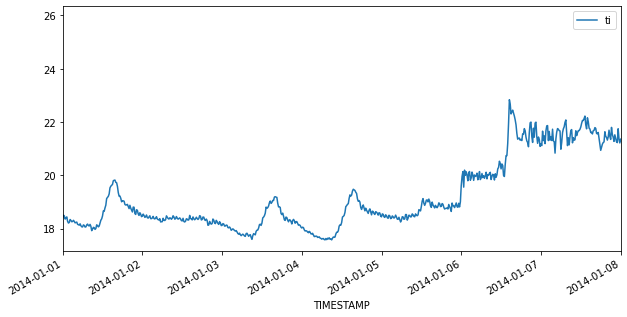

In [7]:
rooms = ['Din_tmp_Avg', 'Grt_tmp_Avg', 'Brkf_tmp_Avg', 'Kit_tmp_Avg', 'BedM_tmp_Avg', 'Bed3_tmp_Avg', 'Bed3_tmp_Avg', 'Bed2_tmp_Avg', 'BedB_tmp_Avg', 'Mbath_tmp_Avg']

df['ti'] = df[rooms].mean(axis=1)

df.plot(y = 'ti',
        xlim = ['2014-01-01', '2014-01-08'],
        figsize = [10, 5])

We can filter the database in order to only keep some of the rows. Here is how to keep only one month of data

In [8]:
filter = (df.index >= '2014-01-01') & (df.index < '2014-02-01')

df_filtered = df.loc[filter]

df_filtered

,TIMESTAMP,RECORD,main_Tot,Batt_Volt_Avg,PV_generated_Tot,HP_in_Tot,HP_out_Tot,Fantech_Tot,solar_HW_pump_Tot,HW_Tot,...,gar_ext_lts_Tot,garage_tmp_Avg,jacuzzi_plg_Tot,dishHot_tmp_Avg,washHot_tmp_Avg,L1_heater_Tot,Tstat1_tmp_Avg,Tstat2_tmp_Avg,TV_plg_Tot,ti
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 00:00:00,8042,1020.0,13.04,0.75,631.30,14.25,2.459,0.0,119.0,...,1.000,50.47,33.38,NaN,NaN,7.375,64.99,NaN,0.438,18.398889
2014-01-01 00:15:00,2014-01-01 00:15:00,8043,1068.0,13.05,0.00,566.30,3.75,16.170,0.0,106.5,...,0.875,50.45,59.75,NaN,NaN,85.800,65.22,NaN,0.417,18.501667
2014-01-01 00:30:00,2014-01-01 00:30:00,8044,737.5,13.05,0.75,442.50,3.75,2.792,0.0,0.0,...,0.875,50.43,63.88,NaN,NaN,72.500,65.19,NaN,0.417,18.472222
2014-01-01 00:45:00,2014-01-01 00:45:00,8045,730.0,13.05,0.75,563.80,3.75,16.130,0.0,0.0,...,1.000,50.40,61.88,NaN,NaN,0.500,65.07,NaN,0.438,18.353889
2014-01-01 01:00:00,2014-01-01 01:00:00,8046,790.0,13.04,0.75,605.00,3.00,2.500,0.0,0.0,...,0.875,50.38,61.13,NaN,NaN,6.625,65.11,NaN,0.438,18.399444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31 22:45:00,2014-01-31 22:45:00,1434,580.0,13.00,0.75,11.25,225.00,16.500,0.0,84.5,...,0.875,47.91,9.88,NaN,NaN,69.630,69.80,71.37,13.460,21.376667
2014-01-31 23:00:00,2014-01-31 23:00:00,1435,525.0,13.00,0.75,11.25,255.80,2.417,0.0,86.0,...,0.875,47.85,11.88,NaN,NaN,0.375,69.11,71.25,13.580,21.137778
2014-01-31 23:15:00,2014-01-31 23:15:00,1436,715.0,13.01,0.75,13.75,290.30,16.170,0.0,88.0,...,1.000,47.80,30.50,NaN,NaN,74.130,69.79,71.37,13.730,21.308889


You can see a summary of one or more columns with the describe() function

In [9]:
df[['ti', 'Outside_Tmp_Avg']].describe()

,ti,Outside_Tmp_Avg
count,35040.000000,35039.000000
mean,22.470264,13.888859
std,1.649619,10.584075
min,17.573333,-21.690556
25%,21.323889,5.550000
50%,22.631389,15.633333
75%,23.952222,22.122222
max,25.920556,183.777778


### Exercise

Create a new data table to only select the days where the mean outdoor temperature is above 10°C.

## Questions

The house has a solar water heater and PV panels. We want to study their productivity, and find out which weather variables they are most influenced by.

* Create a new dataframe containing daily averaged measurements, and only the columns we will need for this study.
* Plot a few graphs showing some weather variables compared to the efficiency of solar systems
* Find how to calculate the correlations between these variables